## Part 1 - Exploring ML techniques for classification tasks

 ### 3.1 Dataset

- **We will use the training.csv and testing.csv data files supplied on LMS
  for this assignment.**
   
- **The training set (training.csv) contains 325 instances instances of multivariate remote sensing data
  of some forest areas in Japan. There are 4 different forest types labelled in the first column (the column
  heading is ‘class’), as described in the link above. The test set (testing.csv) has the same format as
  training.csv and contains 198 test instances.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Read in the contents of both csv files1. Inspect what the columns are by displaying the first few
   lines of the file.**

In [2]:
testing_data = pd.read_csv('testing.csv')
testing_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [3]:
training_data = pd.read_csv('training.csv')
training_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


**2. To simplify the classification task, write Python code to remove all the columns whose names
   begin with `pred_minus_obs`. You should have only 9 features (b1, b2,       , b9) left for both the
   training and test sets.**


In [4]:
testing_req_columns = testing_data.filter(regex='^(?!pred_minus_obs)').columns
testing_req_columns

training_req_columns = training_data.filter(regex='^(?!pred_minus_obs)').columns
training_req_columns

Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9'], dtype='object')

In [5]:
cleaned_training_data = training_data[training_req_columns]
cleaned_training_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


In [6]:
cleaned_testing_data = testing_data[testing_req_columns]
cleaned_testing_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59


### Visualize the dataset

**3. Use appropriate functions to display (visualise) the different features (or attributes/columns). Display
   some plots for visualising the data. Describe what you see in your markdown cells.**

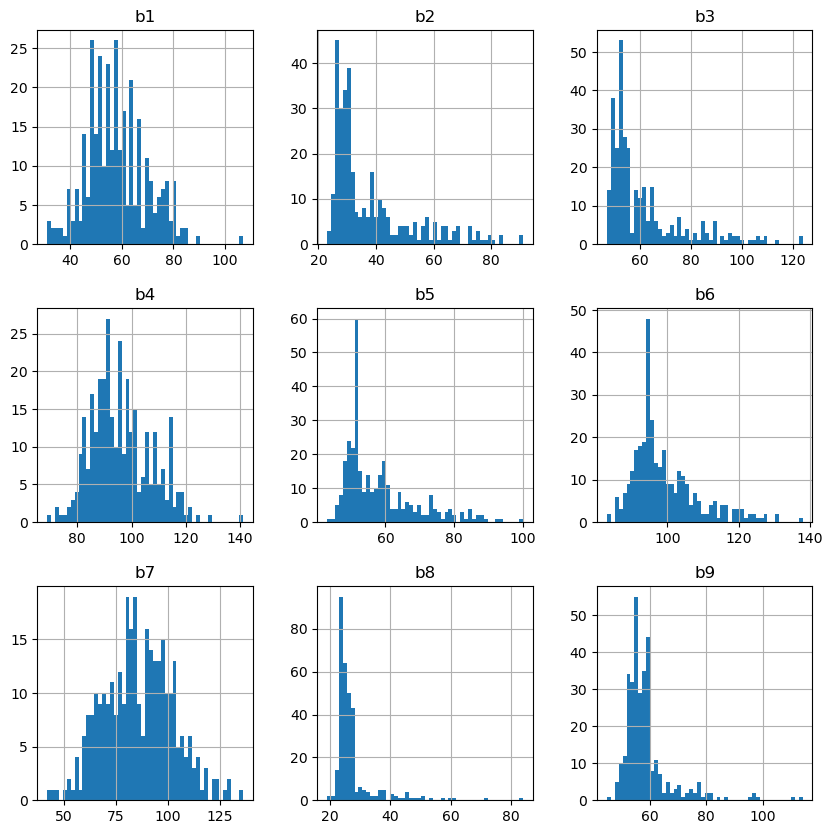

In [7]:
cleaned_training_data.hist(bins=50, figsize=(10, 10))
plt.show()

Most of the features are `right skewed`. They might need certain transformation to make them normal distribution. 

**4. Write Python code to count the number of instances for each class label. Do you have an imbalanced
   training set?**

In [8]:
training_data_class_instances_count = cleaned_training_data['class'].value_counts()
training_data_class_instances_count

s    136
d    105
o     46
h     38
Name: class, dtype: int64

The training data have imbalanced training set. The number of instances belonging to `s` and `d` are more while that of `o` and `h` are less. 
This means once the model is trained, it might perform good on `s` and `d` instances but poorly on `o` and `h`

In [9]:
testing_data_class_instances_count = cleaned_testing_data['class'].value_counts()
testing_data_class_instances_count

s    59
d    54
h    48
o    37
Name: class, dtype: int64

In [10]:
# Taking rows with s and d class for traninig

training_s_or_d_rows = cleaned_training_data[ (cleaned_training_data['class'] == 's') | (cleaned_training_data['class'] == 'd')]
training_s_or_d_rows.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


In [11]:
# Creating testing dataset for 's' and 'd' type of trees

testing_s_or_d_rows = cleaned_testing_data[ (cleaned_testing_data['class'] == 's') | (cleaned_testing_data['class'] == 'd')]
testing_s_or_d_rows.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59
6,s,56,29,50,93,51,94,77,26,58


In [12]:
# Setting 's' as 1 and 'd' as 0 for training and testing purpose

Y_train = (training_s_or_d_rows['class'] == 's').astype(int)
Y_train

Y_test = (testing_s_or_d_rows['class'] ==  's').astype(int)
Y_test

0      0
2      1
3      1
4      0
6      1
      ..
189    1
190    1
191    1
193    0
194    0
Name: class, Length: 113, dtype: int64

In [13]:
# Y_test.iloc[0]

In [14]:
X_train = training_s_or_d_rows.drop(columns=['class'])
X_train

X_test = testing_s_or_d_rows.drop(columns=['class'])
X_test.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,39,36,57,91,59,101,93,27,60
2,53,25,49,99,51,93,84,26,58
3,59,26,49,103,47,92,82,25,56
4,57,49,66,103,64,106,114,28,59
6,56,29,50,93,51,94,77,26,58


**5. Perform an appropriate feature scaling step before doing the classification. You can use
   MinMaxScaler, StandardardScaler, or any suitable scaling function in the
   sklearn.preprocessing package. You can also write your own feature scaling code if you prefer.
   Whichever way, ensure that your feature scaling is applied to both the training data and the test
   data.**

In [15]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_train_scaled

X_test_scaled = std_scaler.fit_transform(X_test)
X_test_scaled

array([[-2.30671337, -0.13560126, -0.21571281, ...,  0.36673576,
         0.85832337,  1.33501823],
       [-0.37794987, -1.0668298 , -0.95157838, ..., -0.19666344,
         0.39646365,  0.65852917],
       [ 0.44866307, -0.98217266, -0.95157838, ..., -0.32186326,
        -0.06539607, -0.01795989],
       ...,
       [ 0.31089424, -1.0668298 , -1.04356158, ..., -0.88526245,
        -1.45097522, -1.03269347],
       [-0.10241222,  1.98082723,  2.81973268, ..., -0.19666344,
        -0.52725579, -0.69444894],
       [ 1.41304482,  2.65808435,  3.09568227, ...,  0.74233522,
        -0.06539607,  0.32028464]])

**6. Use the Logistic Regression Classifier implemented in sklearn.linear model class to perform
   binary classification using examples from two classes: ‘s’ (‘Sugi’ forest) and ‘d’ (‘Mixed deciduous’
   forest). You will need to write Python code to have only examples from these two classes in
   your training and testing set.**

In [16]:
# Selecting b2 as feature [:, 1]

X_train_scaled[:, 1]

array([ 1.38587426, -0.68304602, -0.86295214,  0.57629675, -0.77299908,
        2.1054987 , -0.59309297,  0.75620287, -0.59309297,  0.03657842,
       -0.77299908, -0.23328075, -0.05337463, -0.41318686, -0.14332769,
       -0.86295214, -0.50313991, -0.86295214, -0.86295214, -0.59309297,
        0.03657842, -0.50313991,  0.39639064, -0.86295214, -0.68304602,
       -0.86295214,  1.65573342,  1.83563953,  1.11601509,  0.30643759,
        0.39639064, -0.59309297, -0.3232338 , -0.59309297, -0.59309297,
       -0.95290519,  3.27488842,  0.66624981, -0.68304602, -0.3232338 ,
       -0.68304602, -0.59309297,  0.57629675, -0.68304602, -0.50313991,
       -0.77299908, -0.86295214,  0.21648453,  0.30643759,  0.30643759,
       -0.77299908, -0.59309297,  0.66624981, -0.95290519, -0.50313991,
       -0.95290519, -0.77299908, -0.95290519,  1.2959212 , -0.23328075,
       -0.77299908,  1.83563953, -0.59309297, -0.59309297,  0.57629675,
       -0.3232338 ,  1.2959212 , -0.95290519, -0.3232338 , -0.68

**7. (a) Plot the estimated probabilities and decision boundary (as in Figure 4.23 of the textbook)
of your Logistic Regression Classifier considering two individual features. You can choose
which ones they will be. Therefore, you will need to create a Logistic Regression model for
each of these two features and inspect the decision boundaries. Hence, you should provide
two plots.**

In [17]:
pd.DataFrame(X_train_scaled[:, 1]).describe()

,0
count,2.410000e+02
mean,-1.400447e-16
std,1.002081e+00
min,-1.132811e+00
25%,-6.830460e-01
50%,-4.131869e-01
75%,3.963906e-01
max,4.983996e+00


In [18]:
X_train_scaled_b2 = X_train_scaled[:, 1].reshape(-1,1)

from sklearn.linear_model import LogisticRegression

log_reg_b2 = LogisticRegression()
log_reg_b2.fit(X_train_scaled_b2, Y_train)

LogisticRegression()

In [19]:
pd.DataFrame(X_train_scaled[:, 1]).describe()

,0
count,2.410000e+02
mean,-1.400447e-16
std,1.002081e+00
min,-1.132811e+00
25%,-6.830460e-01
50%,-4.131869e-01
75%,3.963906e-01
max,4.983996e+00


In [20]:
X_new_b2 = np.linspace(-1.132811, 4.983996, 1000).reshape(-1, 1)
Y_prob_b2 = log_reg_b2.predict_proba(X_new_b2)
Y_prob_b2

array([[1.79247732e-02, 9.82075227e-01],
       [1.83506417e-02, 9.81649358e-01],
       [1.87864348e-02, 9.81213565e-01],
       ...,
       [9.99999998e-01, 2.42042940e-09],
       [9.99999998e-01, 2.36323257e-09],
       [9.99999998e-01, 2.30738734e-09]])

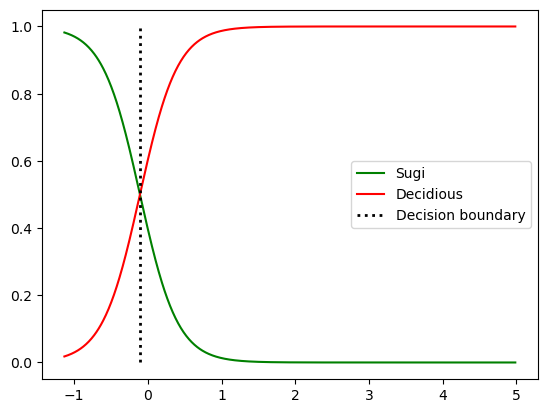

In [21]:
plt.plot(X_new_b2, Y_prob_b2[:, 1], "g-", label="Sugi")
plt.plot(X_new_b2, Y_prob_b2[:, 0], "r-", label="Decidious")
decision_boundary_b2 = X_new_b2[Y_prob_b2[:, 1] >= 0.5][-1, 0]
plt.plot([decision_boundary_b2, decision_boundary_b2], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
plt.legend(loc='best')
plt.show()

In [22]:
# Select b8 as another individual feature

X_train_scaled[:, 7]

# pd.DataFrame(X_train_scaled[:, 7]).describe()
X_train_scaled_b8 = X_train_scaled[:, 7].reshape(-1,1)

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg_b8 = LogisticRegression()
log_reg_b8.fit(X_train_scaled_b8, Y_train)

X_new_b8 = np.linspace(-2.716641, 5.14512, 1000).reshape(-1, 1)
Y_prob_b8 = log_reg_b8.predict_proba(X_new_b8)

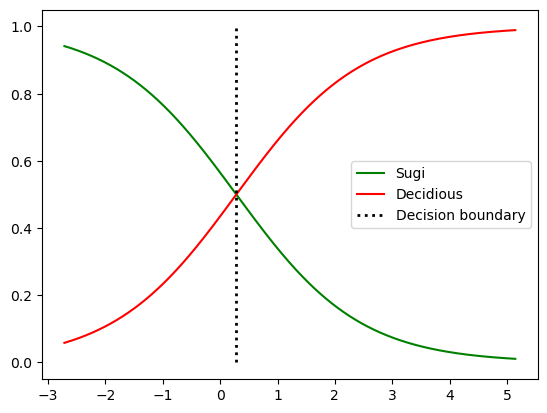

In [24]:
plt.plot(X_new_b8, Y_prob_b8[:, 1], "g-", label="Sugi")
plt.plot(X_new_b8, Y_prob_b8[:, 0], "r-", label="Decidious")

decision_boundary_b8 = X_new_b8[Y_prob_b8[:, 1] >= 0.5][-1, 0]
plt.plot([decision_boundary_b8, decision_boundary_b8], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
plt.legend(loc='best')
plt.show()

**7(b). Now plot the estimated probabilities and decision boundary for a model considering all features.
To build your plot, you must use the score value of the linear part from the logistic
regression model in the x-axis. Then, you choose randomly 10 instances of the testing set,
add then to your plot, and verify if you have made a right or wrong decision (how would you
classify the test instances) regarding the decision boundary of 50%. Comment about your
results.**



In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, Y_train)

LogisticRegression()

In [26]:
X_scores = np.dot(X_train_scaled, log_reg.coef_.reshape(9,1)) + log_reg.intercept_
sigmoid_prob = 1/(1 + np.exp(-X_scores))

Tree at 1 index 1
Tree at 2 index 1
Tree at 3 index 0
Tree at 4 index 1
Tree at 5 index 0
Tree at 6 index 1
Tree at 7 index 0
Tree at 8 index 0
Tree at 9 index 1
Tree at 10 index 0


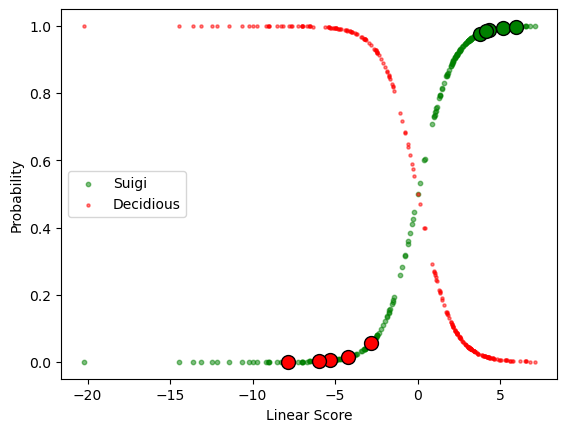

In [27]:
import math

for i in range(1, 11):
    
    X_test_0 = X_test_scaled[i]      
    print(f'Tree at {i} index', Y_test.iloc[i])

    X_score_0 = np.dot(X_test_0, log_reg.coef_.reshape(9,1)) + log_reg.intercept_
    X_score_0

    sigmoid_prob_3 = 1/(1 + math.exp(-X_score_0))
    sigmoid_prob_3
    
    if  Y_test.iloc[i] == 0:
        color = 'red'
        label = 'Real Suigi'
    else:
        color = 'green'
        label = 'Real Decidious'
    
    plt.plot(X_score_0, sigmoid_prob_3, marker="o", markersize=10, markeredgecolor='black', markerfacecolor=color)
    

plt.scatter(X_scores, sigmoid_prob, s=10, alpha=0.5, c='green', label="Suigi")
plt.scatter(X_scores, 1-sigmoid_prob, s=5, c='red', alpha=0.5, label="Decidious")
plt.xlabel("Linear Score")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.show()

In [28]:
Y_train_predict_prob = log_reg.predict_proba(X_train_scaled)

# Y_train_predict_s = Y_train_predict_prob[:, 1] >= 0.5
# Y_train_predict_s

Y_train_s = Y_train == 1
Y_train_s

0      False
1       True
2       True
3      False
4       True
       ...  
316     True
318     True
321    False
322     True
323     True
Name: class, Length: 241, dtype: bool

**8. Plot precision versus recall and comments on the results. How does the performance measure
behave? What threshold would you choose and why?**

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Y_train_predict_s = cross_val_predict(log_reg, X_train_scaled, Y_train_s, cv=3)
cm = confusion_matrix(Y_train_s, Y_train_predict_s)

Y_train_perfect_predictions = Y_train_s  # pretend we reached perfection
confusion_matrix(Y_train_s, Y_train_perfect_predictions)

array([[105,   0],
       [  0, 136]])

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train_s, Y_train_predict_s) 

0.9424460431654677

In [31]:
recall_score(Y_train_s, Y_train_predict_s)

0.9632352941176471

In [32]:
from sklearn.metrics import f1_score

f1_score(Y_train_s, Y_train_predict_s)

0.9527272727272728

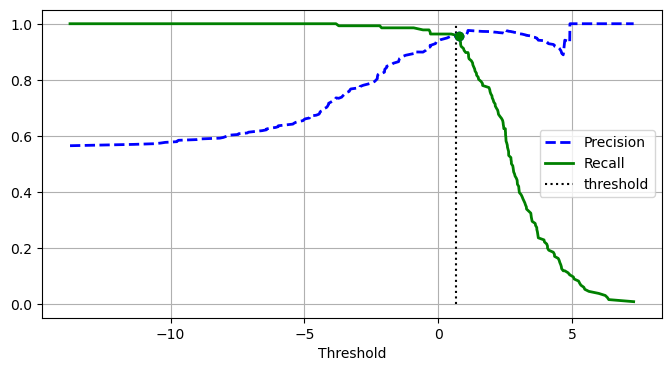

In [33]:
from sklearn.metrics import precision_recall_curve, roc_curve


# Question 11: Use 3-fold cross-validation and discuss the generalisation capacity of the two classifiers.
y_scores = cross_val_predict(log_reg, X_train_scaled, Y_train_s, cv=3,
                                 method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(Y_train_s, y_scores)

threshold = 0.65 # Choose this threshold after experimenting the one that intersects at recall vs precision graph

plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

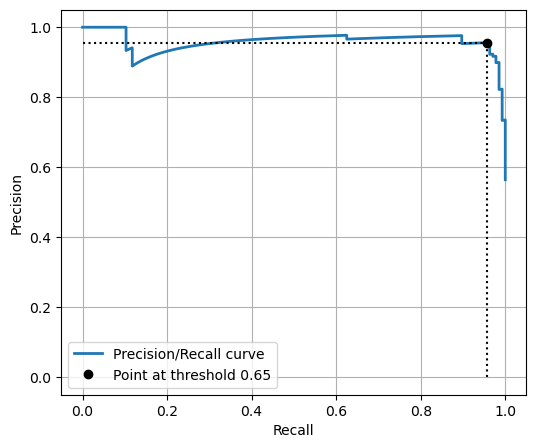

In [34]:
plt.figure(figsize=(6, 5)) 
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 0.65")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [35]:
idx_for_95_precision = (precisions >= 0.95).argmax()
threshold_for_95_precision = thresholds[idx_for_95_precision]
threshold_for_95_precision

0.48086630286736487

In [36]:
y_train_pred_95 = (y_scores >= threshold_for_95_precision)
precision_score(Y_train_s, y_train_pred_95)

0.9562043795620438

In [37]:
recall_at_95_precision = recall_score(Y_train_s, y_train_pred_95)
recall_at_95_precision

0.9632352941176471

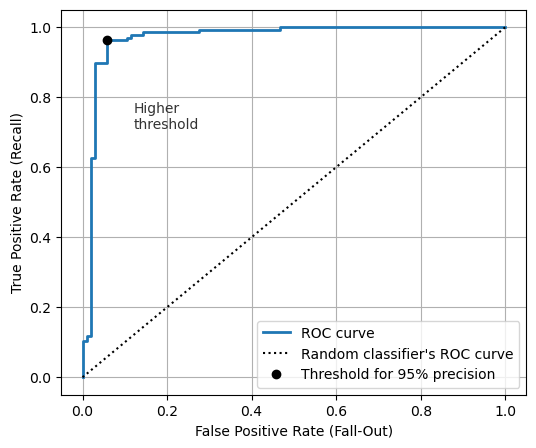

In [38]:
fpr, tpr, thresholds = roc_curve(Y_train_s, y_scores)

idx_for_threshold_at_95 = (thresholds <= threshold_for_95_precision).argmax()
tpr_95, fpr_95 = tpr[idx_for_threshold_at_95], fpr[idx_for_threshold_at_95]

plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_95], [tpr_95], "ko", label="Threshold for 95% precision")

plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
# plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=10)

plt.show()

**9. Use the k-nearest neighbours (k-NN) algorithm for the same binary classification task. Try different
values of k. Which value did you choose? Why?**

- I choose to go with `{'n_neighbors': 6, 'weights': 'uniform'}` after running it through GridSearchCV which had the best score of `0.93`

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5) # Default n = 5
knn_clf.fit(X_train_scaled, Y_train)
knn_clf.score(X_test_scaled, Y_test)

0.9911504424778761

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [41]:
grid_search.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [42]:
grid_search.best_score_

0.9379251700680273

In [43]:
knn_clf = KNeighborsClassifier(n_neighbors=6) # Found n_neighbours = 6 is best after the Grid SearchCV
knn_clf.fit(X_train_scaled, Y_train)
knn_accuracy = knn_clf.score(X_test_scaled, Y_test)
knn_accuracy

0.9911504424778761

In [44]:
Y_test_pred = log_reg.predict(X_test_scaled)
Y_test_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0])

**10. Compare the performances of the two classifiers (Logistic Regression and k-NN) and give a brief
discussion about your experimental results. You should show the confusion matrices, ROC curves
and accuracies of the two classifiers for the testing set. Remember to discuss which threshold for
the Logistic Regression you used to get the results.**

> **Accuracy between the classifiers**
>  - Logistic Regression accuracy: 1.000
>  - k-NN accuracy: 0.991

>  *So, the accuracy of logistic regresssion is 100% while that of k-NN is 99%*

In [45]:
Y_prob_test = log_reg.predict_proba(X_test_scaled)[:, 1]
cm_lr = confusion_matrix(Y_test, Y_test_pred)
cm_lr

array([[54,  0],
       [ 0, 59]])

In [46]:
y_pred_knn = knn_clf.predict(X_test_scaled)
y_pred_knn

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]  # predicted probabilities for class 1

# Choose threshold that maximizes AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)
optimal_idx = np.argmax(tpr_lr - fpr_lr)
optimal_threshold_lr = thresholds_lr[optimal_idx]

# Evaluate k-NN classifier on testing set
y_pred_knn = knn_clf.predict(X_test_scaled)

# Compute and plot confusion matrices
cm_lr = confusion_matrix(Y_test, y_pred_lr)
cm_knn = confusion_matrix(Y_test, y_pred_knn)


**Confusion Matrix for logistic regression classifier**

In [48]:
cm_lr

array([[54,  0],
       [ 0, 59]])

**Confusion Matrix for k-NN classifier**

In [49]:
cm_knn

array([[54,  0],
       [ 1, 58]])

**ROC Curve for Losgistic Regression**

Logistic Regression accuracy: 1.000
k-NN accuracy: 0.991


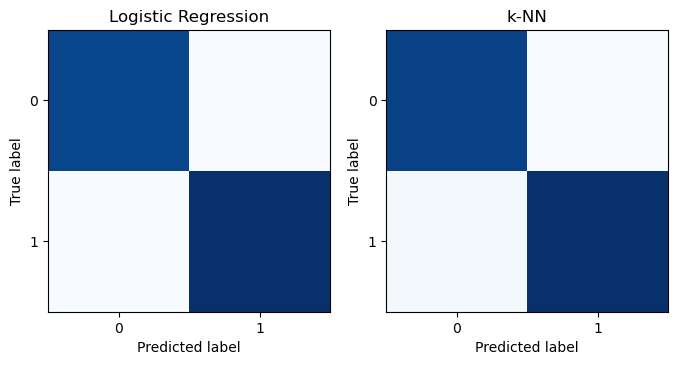

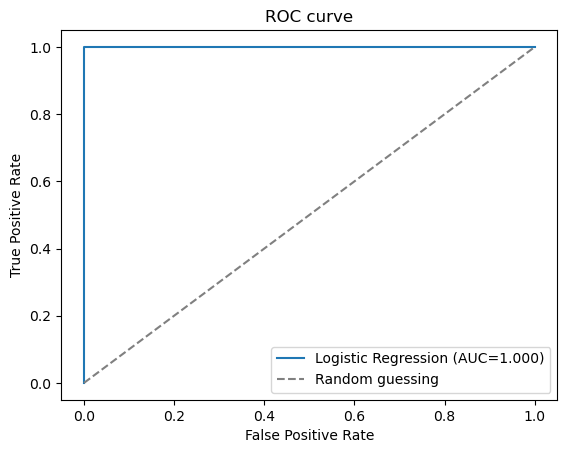

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(cm_lr, cmap=plt.cm.Blues)
axes[0].set_title("Logistic Regression")
axes[1].imshow(cm_knn, cmap=plt.cm.Blues)
axes[1].set_title("k-NN")
for ax in axes.flat:
    ax.set_xticks(range(2))
    ax.set_yticks(range(2))
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

# Plot ROC curves
fig, ax = plt.subplots()
ax.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")
ax.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random guessing")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curve")
ax.legend()

# Compute and print accuracies
acc_lr = accuracy_score(Y_test, y_pred_lr)
acc_knn = accuracy_score(Y_test, y_pred_knn)
print(f"Logistic Regression accuracy: {acc_lr:.3f}")
print(f"k-NN accuracy: {acc_knn:.3f}")

**ROC Curve for k-NN classifier**

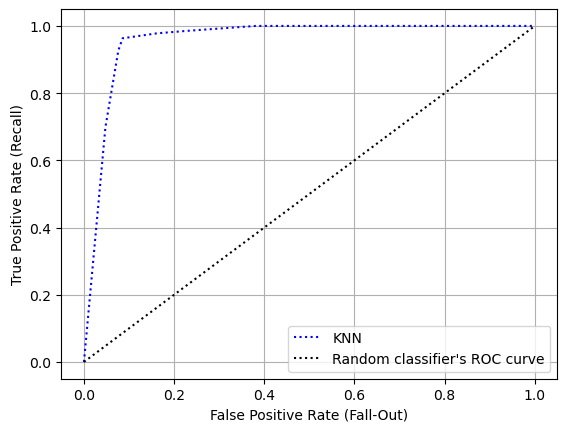

In [51]:
# to draw ROC FOR TRAINING SET


# Question 11: Use 3-fold cross-validation and discuss the generalisation capacity of the two classifiers.
y_probs_knn = cross_val_predict(knn_clf, X_train_scaled, Y_train_s, cv=3, method="predict_proba") 

# Use 3-fold cross-validation and discuss the generalisation capacity of the two classifiers.
y_scores_knn = y_probs_knn[:, 1]

fpr_train_knn, tpr_train_knn, thresholds_train_knn =  roc_curve(Y_train, y_scores_knn)

plt.plot(fpr_train_knn, tpr_train_knn, "b:", label="KNN")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.legend(loc="lower right")

plt.show()

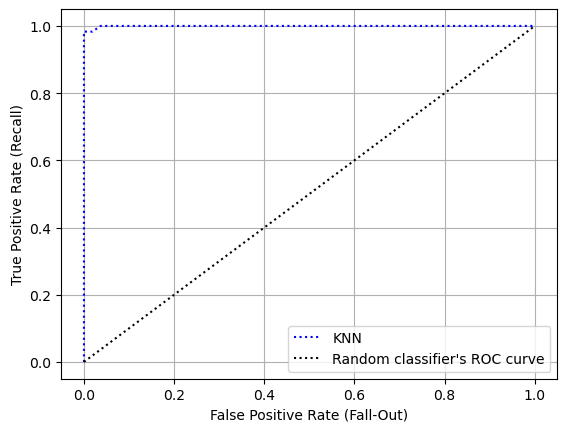

In [52]:
Y_test_probs_knn = knn_clf.predict_proba(X_test_scaled)

fpr_test_knn, tpr_test_knn, thresholds_test_knn = roc_curve(Y_test, Y_test_probs_knn[:, 1])

plt.plot(fpr_test_knn, tpr_test_knn, "b:", label="KNN")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.legend(loc="lower right")

plt.show()

## 3.3 Tasks- Multiclass classification

**12. Use the Support Vector Machine Classifier implemented in the sklearn.svm.SVC class to perform
    multiclass classification using the one-versus-one strategy. You should look at the Scikit-learn
    API for this class and experiment with two hyperparameters. You should use grid search and 3-
    fold cross validation to find the optimal values for these two hyperparameters that maximise the
classification accuracy.**

**For other hyperparameters, you can manually set them to some reasonable values. Apart from
the Python code, you should explain what you carried out in markdown cells, e.g., which two
hyperparameters you have tried? What combination of the hyperparameter values gave the highest
classification accuracy?**

In [53]:
# Data Preparation

Y_train_all = cleaned_training_data['class']
print("Y_train_all\n", Y_train_all)

X_train_all = cleaned_training_data.drop(columns=['class'])
print("X_train_all\n", X_train_all)

Y_train_all
 0      d
1      s
2      s
3      d
4      s
      ..
320    o
321    d
322    s
323    s
324    h
Name: class, Length: 325, dtype: object
X_train_all
      b1  b2  b3   b4  b5   b6   b7  b8  b9
0    67  51  68  115  69  111  136  31  67
1    67  28  51   99  50   97   82  26  59
2    63  26  50   95  49   91   81  26  57
3    63  42  63   97  66  108  111  28  59
4    46  27  50   83  51   90   76  26  56
..   ..  ..  ..  ...  ..  ...  ...  ..  ..
320  55  56  72   91  79  113   86  35  68
321  69  49  76   91  52   91   92  25  57
322  49  26  48  107  59  104   62  22  53
323  55  26  52   92  55   98   65  23  56
324  71  28  51   96  46   88   92  25  58

[325 rows x 9 columns]


In [54]:
# Test Data Preparation
Y_test_all = cleaned_testing_data['class']
print("Y_test_all\n", Y_test_all) 

X_test_all = cleaned_testing_data.drop(columns=['class'])
print("X_test_all\n", X_test_all)

# Scale the X_test_data
X_test_scaled_all = std_scaler.fit_transform(X_test_all)
print("X_test_scaled_all\n", X_test_scaled_all)

Y_test_all
 0      d
1      h
2      s
3      s
4      d
      ..
193    d
194    d
195    h
196    h
197    h
Name: class, Length: 198, dtype: object
X_test_all
      b1  b2  b3   b4  b5   b6   b7  b8  b9
0    39  36  57   91  59  101   93  27  60
1    84  30  57  112  51   98   92  26  62
2    53  25  49   99  51   93   84  26  58
3    59  26  49  103  47   92   82  25  56
4    57  49  66  103  64  106  114  28  59
..   ..  ..  ..  ...  ..  ...  ...  ..  ..
193  55  61  90   75  55   91   84  24  54
194  66  69  93   90  63  100   99  25  57
195  79  30  55  115  51   96  109  25  59
196  69  27  53  106  47   90   87  24  55
197  80  29  55  116  50   95  102  25  59

[198 rows x 9 columns]
X_test_scaled_all
 [[-1.8787969  -0.28223274 -0.3865936  ...  0.15428138 -0.18893459
  -0.11433257]
 [ 1.6513761  -0.61954914 -0.3865936  ...  0.08997041 -0.3006034
   0.09053484]
 [-0.78052085 -0.90064614 -0.84980409 ... -0.4245174  -0.3006034
  -0.31919997]
 ...
 [ 1.25913466 -0.61954914 -0.502

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Scikit Learn detects when you try to use a binary 
# classification algorithm for a multiclass classificaition task and it automatically runs OvR or OVO

svm_clf = SVC(random_state=8)

# To implement this using the SVC class from the sklearn.svm module, 
# we can set the decision_function_shape hyperparameter to 'ovo' (one-vs-one). 
# The two hyperparameters we can experiment with are the regularization parameter C and the kernel parameter gamma.


# We will use grid search and 3-fold cross-validation to find the optimal values for C and gamma 
# that maximize the classification accuracy. 
# We can manually set other hyperparameters such as the kernel type, degree, and class weights.

# Set the SVM parameters to be tuned
params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Scaling the data
std_scaler = StandardScaler()
X_train_scaled_all = std_scaler.fit_transform(X_train_all)

# Create an SVM object with 'ovo' decision_function_shape
svm = SVC(kernel='rbf', decision_function_shape='ovo', class_weight='balanced')

# Note that the n_jobs parameter in GridSearchCV is set to -1, which means that the search will use all available CPU cores to speed up the computation. 
# Also, the class_weight parameter is set to 'balanced',
# which will adjust the weights of each class to be inversely proportional to their frequency in the input data. This helps to deal with class imbalance issues.

grid_search = GridSearchCV(svm, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled_all, Y_train_all)

# Print the best parameters and their corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Evaluate the best model on the testing set
best_model_svm = grid_search.best_estimator_

#Scaling test data
test_accuracy = best_model_svm.score(X_test_scaled_all, Y_test_all)
print("Testing accuracy: ", test_accuracy)

best_model_svm.predict(X_test_scaled_all)

Best parameters:  {'C': 1, 'gamma': 0.1}
Best accuracy:  0.86470721486012
Testing accuracy:  0.9040404040404041


array(['d', 'h', 's', 's', 'd', 'h', 's', 'd', 's', 'o', 'd', 'o', 'o',
       'd', 's', 'o', 'o', 'd', 's', 's', 'o', 'd', 's', 's', 'd', 's',
       'd', 'd', 'd', 'd', 'd', 's', 'o', 's', 'd', 'd', 'd', 'h', 'o',
       'd', 'd', 'd', 's', 's', 'h', 'd', 'd', 'o', 'd', 's', 'd', 's',
       's', 'h', 'h', 's', 'o', 'd', 's', 'h', 'd', 'd', 'o', 'o', 's',
       's', 'h', 'd', 'd', 'h', 'o', 'o', 'o', 's', 'h', 's', 'd', 'o',
       'h', 's', 'd', 'd', 'o', 'h', 'o', 'h', 'd', 'd', 's', 'o', 'o',
       's', 'd', 'o', 'd', 's', 'o', 'h', 'o', 's', 'd', 'o', 'h', 's',
       'h', 'h', 'h', 'd', 's', 's', 'd', 'o', 'd', 'd', 'h', 'o', 's',
       'h', 's', 's', 's', 's', 'd', 'd', 's', 's', 'h', 's', 'h', 'd',
       's', 's', 'o', 's', 'h', 's', 'o', 's', 'd', 's', 's', 'h', 's',
       'h', 's', 'd', 'd', 's', 'h', 'd', 's', 'h', 's', 'd', 'o', 'd',
       's', 'd', 'd', 's', 'o', 'd', 'o', 's', 'd', 'h', 's', 's', 'o',
       'd', 's', 'h', 'h', 'h', 's', 's', 'h', 'd', 'h', 'd', 's

**13. Use the Softmax Regression and the k-NN algorithm (try with some different values of k) on the
same classification tasks and comment about the results of the three techniques (SVM, Softmax
Regression and k-NN).**

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# solver="lbfgs" is default

# 'multinomial': This uses the Softmax function to compute 
#  the probabilities of each class directly, without training separate binary classifiers. This approach is also known as "multinomial logistic regression".

# the multi_class parameter in LogisticRegression is required when you want to perform multiclass classification using Softmax Regression. 
# This parameter specifies the strategy used to handle multiclass problems, and it can take one of the following values:

# 'ovr': This stands for "one-vs-rest" and is the default value. It trains a separate binary classifier for each class, treating that class as the positive class and all the other classes as the negative class. The final prediction is then made by selecting the class with the highest score among all the binary classifiers.

# 'multinomial': This uses the Softmax function to compute the probabilities of each class directly, without training separate binary classifiers. This approach is also known as "multinomial logistic regression".

# 'auto': This automatically chooses between 'ovr' and 'multinomial' based on the input data and the solver used.

# In general, if you have a small number of classes (e.g., less than 10) and a moderate amount of data, it is recommended to use 'multinomial' to take advantage of the Softmax function and obtain more accurate probability estimates. If you have a large number of classes or a large amount of data, it may be faster and more practical to use 'ovr'.

softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_clf.fit(X_train_scaled_all, Y_train_all)



LogisticRegression(multi_class='multinomial')

In [57]:
softmax_pred = softmax_clf.predict(X_test_scaled_all)
softmax_accuracy = accuracy_score(Y_test_all, softmax_pred)

print("Softmax Regression accuracy: ", softmax_accuracy)

Softmax Regression accuracy:  0.8585858585858586


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train_scaled_all, Y_train_all)

grid_search.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [59]:
knn_clf_for_all_trees = KNeighborsClassifier(n_neighbors=9) # Found n_neighbors to be 9. from GridSearchCV
knn_clf_for_all_trees.fit(X_train_scaled_all, Y_train_all)
knn_pred = knn_clf_for_all_trees.predict(X_test_scaled_all)
knn_accuracy = accuracy_score(Y_test_all, knn_pred)

print("knn_accuracy", knn_accuracy)

knn_accuracy 0.8131313131313131


## California Housing Prices dataset
### Part 2 - Implementing the k-nearest neighbours (k-NN) algorithm to do regression

In [60]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

"""
  1. It sets the tarball_path variable to the path of a compressed tarball file (housing.tgz) that contains the housing data.

  2. It checks if the tarball file exists on disk.
     If it does not exist, it creates a new directory (datasets) and downloads the tarball file from a remote URL 
     (https://github.com/ageron/data/raw/main/housing.tgz) using the urlretrieve function from the urllib.request module.
     It then extracts the contents of the tarball file into the datasets directory using the extractall method of the tarfile module.
     
  3. Finally, it loads the housing data from a CSV file (housing.csv) in the datasets/housing directory using the read_csv function from the pandas module,
     and returns it as a DataFrame.
"""

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [61]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [63]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualizing the data

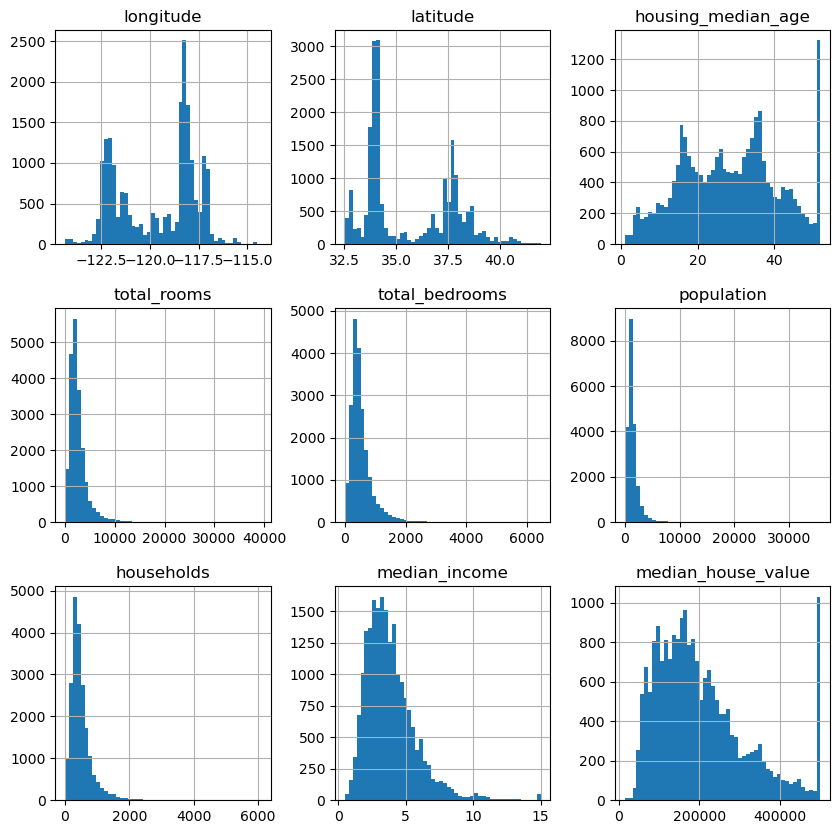

In [64]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10, 10))
plt.show()

In [65]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


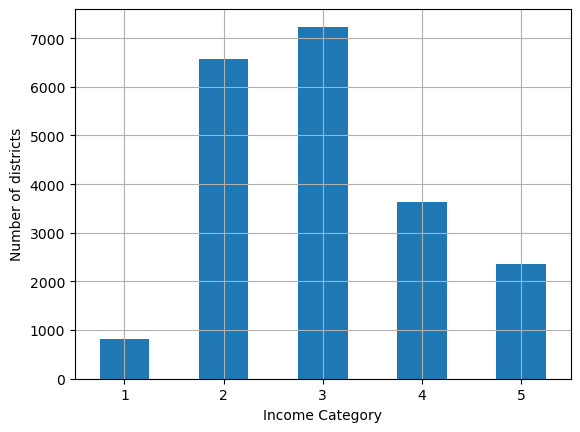

In [66]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

**1. Randomly split the data into a training set (say 80%) and a test set (say 20%), apply the k-NN
regressor, and evaluate how good the regressor performs by computing the root mean square error
(RMSE) of the predicted house prices of the test set**

In [67]:
# Shorter way to get a single split using train_test_split() function
# Create Stratified sampling from the data such that "median_income" is given priority in the dataset
# Randomly split the data into a training set (say 80%) and a test set (say 20%), apply the k-NN regressor

from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [68]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3


In [69]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [70]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [71]:

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Created `income_cat` just so that we can represent the whole population based on the median income
Stratified Sampling takes the sample in respective proportion of original population. This can be good while training so that model is not 
biased to certain group. We don't need `income_cat` for any other reason except for creating stratified sampling

In [72]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [73]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY


In [74]:
housing_train = strat_train_set.copy()
housing_train.head()

housing_test = strat_test_set.copy()
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY


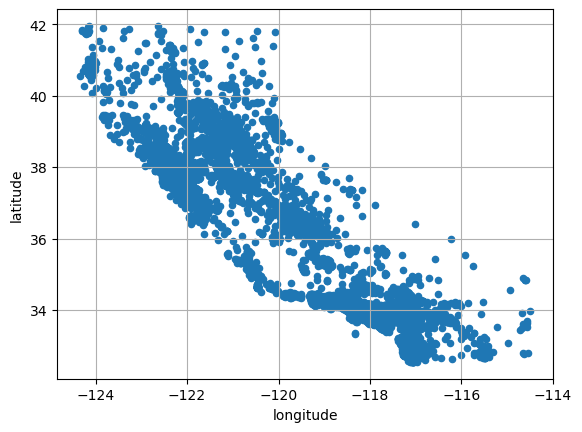

In [75]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

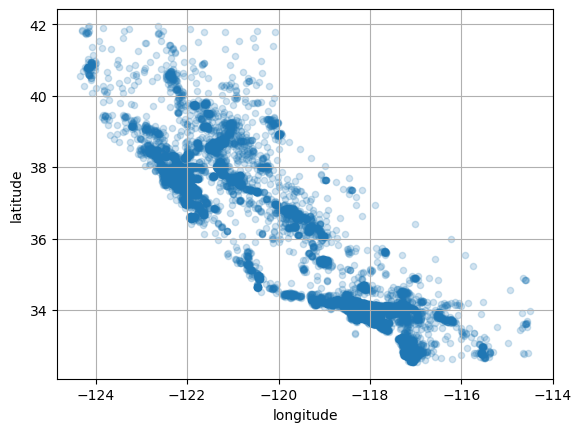

In [76]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

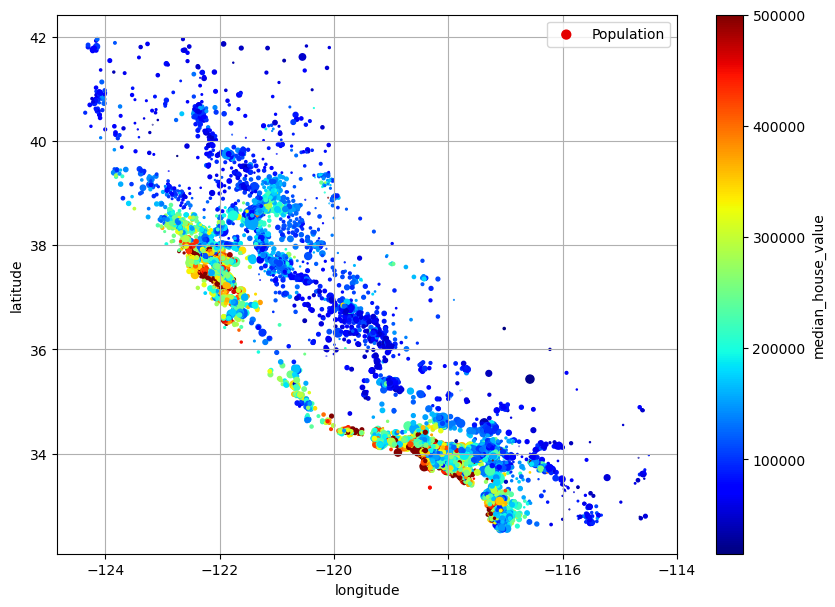

In [77]:
housing_train.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=housing_train["population"] / 200, label="Population", 
                   c="median_house_value", cmap="jet", colorbar=True, sharex=False, legend=True, figsize=(10, 7))
plt.show()

In [78]:
# Compute standard correlation coefficient between every pair of attributes

corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


**2. Experiment with a selection of columns (avoid those columns that contain text) from the dataset to
form your feature vectors. The number of columns that you choose would become the dimension
n of your feature vectors. Note that you would need to do some normalization so that your data is
not dominated by some columns that have large magnitudes.**

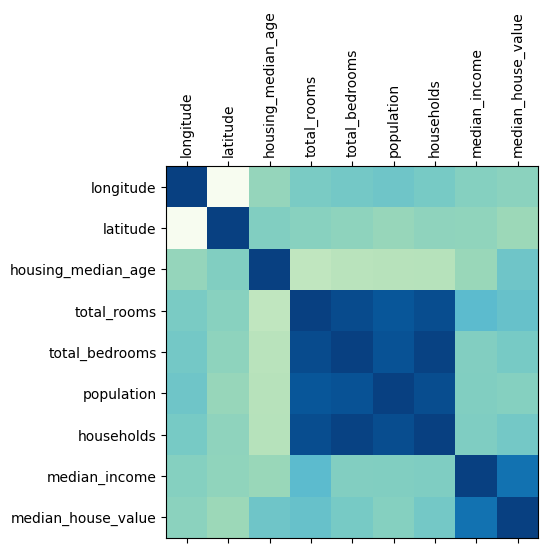

In [79]:
housing_train_num_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

plt.matshow(corr_matrix,  cmap='GnBu')
plt.xticks(np.arange(9), housing_train_num_columns)
plt.xticks(rotation=90)
plt.yticks(np.arange(9), housing_train_num_columns)
plt.show()

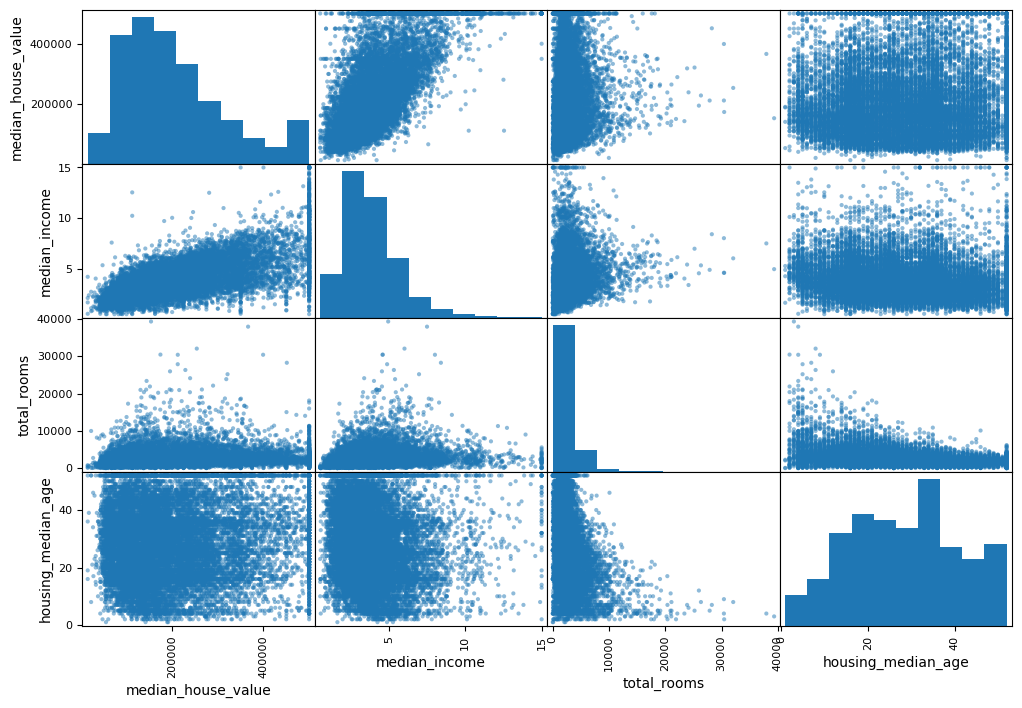

In [80]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))
plt.show()

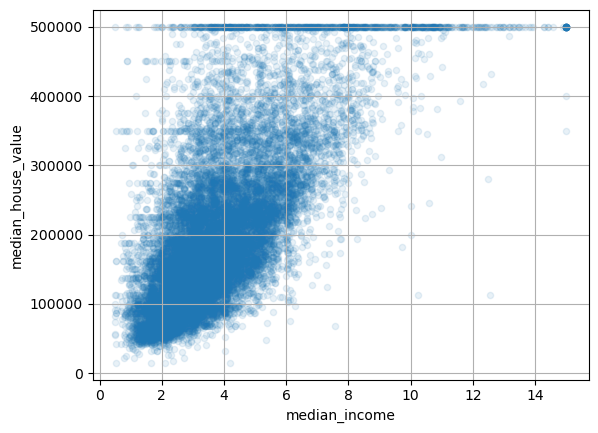

In [81]:
housing_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [82]:
# Exploring features and combining features that makes sense

housing_train['rooms_per_house'] = housing_train['total_rooms'] / housing_train['households']
housing_train['bedrooms_ratio'] = housing_train['total_bedrooms'] / housing_train['total_rooms']
housing_train['people_per_house'] = housing_train['population'] / housing_train['households']

In [83]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,4.511933,0.230891,2.058473


In [84]:
housing_corr_matrix = housing_train.corr(numeric_only=True)
housing_corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [85]:
housing_training_X = strat_train_set.drop(columns=['median_house_value'])
housing_test_X = strat_test_set.drop(columns=['median_house_value'])

In [86]:
housing_train_target_labels = strat_train_set['median_house_value'].copy()
housing_test_target_labels = strat_test_set['median_house_value'].copy()

In [87]:
from sklearn.impute import SimpleImputer

train_imputer = SimpleImputer(strategy='median')

housing_train_set_X_num = housing_training_X.select_dtypes(include=[np.number])
housing_test_set_X_num = housing_test_X.select_dtypes(include=[np.number])

train_imputer.fit(housing_train_set_X_num)

SimpleImputer(strategy='median')

In [88]:
X_train = train_imputer.transform(housing_train_set_X_num) # Fill missing values by median of the training set
X_train

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [89]:
housing_X_train = pd.DataFrame(X_train, columns=housing_train_set_X_num.columns, index=housing_train_set_X_num.index)

housing_X_train['rooms_per_house'] = housing_X_train['total_rooms'] / housing_X_train['households']
housing_X_train['bedrooms_ratio'] = housing_X_train['total_bedrooms'] / housing_X_train['total_rooms']
housing_X_train['people_per_house'] = housing_X_train['population'] / housing_X_train['households']

In [90]:
housing_X_train_final = housing_X_train.drop(columns=['total_rooms', 'total_bedrooms'])
housing_X_train_final

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,1576.0,1034.0,2.0987,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,666.0,357.0,6.0876,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,562.0,203.0,2.4330,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,1845.0,780.0,2.2618,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,1912.0,1172.0,3.5292,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,938.0,523.0,4.7105,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,1419.0,532.0,2.5733,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,2814.0,760.0,4.0616,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,1725.0,838.0,4.1455,4.511933,0.230891,2.058473


**3. Try also setting the parameter weights to ‘uniform’ (this is equivalent to setting wi = 1=k; 8i)
and to ‘distance’ (this is equivalent to setting wi = 1=(d(X(i);Xtest) +  )) and then compare
the root mean squared errors (RMSEs) of their predictions.**

In [91]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor


# setting the parameter weights to ‘uniform’ 

uniform_knn_housing_model = TransformedTargetRegressor(KNeighborsRegressor(weights='uniform'), transformer=StandardScaler())
uniform_knn_housing_model

uniform_knn_housing_model.fit(housing_X_train_final, housing_train_target_labels)

TransformedTargetRegressor(regressor=KNeighborsRegressor(),
                           transformer=StandardScaler())

In [92]:
test_set_num = strat_test_set.drop(columns=['median_house_value', 'ocean_proximity'])
test_imputer = SimpleImputer(strategy='median')
test_imputer.fit(housing_test_set_X_num) 

SimpleImputer(strategy='median')

In [93]:
X_test = test_imputer.transform(housing_test_set_X_num)
housing_X_test = pd.DataFrame(X_test, columns=housing_test_set_X_num.columns, index=housing_test_set_X_num.index)
housing_X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037
...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721


In [94]:
housing_X_test['rooms_per_house'] = housing_X_test['total_rooms'] / housing_X_test['households']
housing_X_test['bedrooms_ratio'] = housing_X_test['total_bedrooms'] / housing_X_test['total_rooms']
housing_X_test['people_per_house'] = housing_X_test['population'] / housing_X_test['households']
housing_X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,7.000000,0.149560,2.677419
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,5.841912,0.166772,2.955882
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,3.935462,0.295858,1.421158
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,5.854054,0.195291,2.897297
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,3.584184,0.366548,1.849490
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,5.622921,0.196252,2.229205
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,4.343675,0.252198,2.706444
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,6.924242,0.160832,2.984848
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,5.339332,0.184401,3.825193


In [95]:
housing_X_test_final = housing_X_test.drop(columns=['total_rooms', 'total_bedrooms'])
housing_Y_test_pred_uniform = uniform_knn_housing_model.predict(housing_X_test_final)

In [96]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(housing_test_target_labels, housing_Y_test_pred_uniform))
print("RMSE: {:.2f}".format(rmse))

RMSE: 114815.85


In [97]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor

# setting the parameter weights to ‘distance’ 
distance_knn_housing_model = TransformedTargetRegressor(KNeighborsRegressor(weights='distance'), transformer=StandardScaler())
distance_knn_housing_model.fit(housing_X_train_final, housing_train_target_labels)

housing_Y_test_pred_distance = distance_knn_housing_model.predict(housing_X_test_final)
rmse = np.sqrt(mean_squared_error(housing_test_target_labels, housing_Y_test_pred_distance))
print("RMSE: {:.2f}".format(rmse))

RMSE: 114401.16


In [98]:
housing["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64



The RMSE error of KNeigborsRegressor with `weights='distance'` is lesser than with `weights='uniform'`. However, it's still larger. 

The min value for the house value is `149991` while the max house value is capped at `500001`. Although the RMSE is below the max value, the model might have underfit the training data. This means that we might need to scale some features that are skewed to the right so that transformed data is uniformly or normally distributed. 